<a href="https://colab.research.google.com/github/jabricaurte/Eibelec/blob/main/Copy_of_Exp_NNA_NEOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa que utiliza los datos de la enfermedad Neospora. Se realiza el proceso de análisis exploratorio, selección de características, ajuste de la red neuronal, entrenamiento, validación y al final se guarda el modelo.


### Cargar datos



In [ ]:
# Las librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Libreria para guardar modelos
!pip install joblib

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

In [ ]:
# Montar el drive para consumir datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Análisis exploratorio de datos.

In [ ]:
# Cargar Datos
Data = pd.read_excel('/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/pruebas/Neos.xlsx')


In [ ]:
#mostrar los 5 primeros datos (generalidad de las observaciones)
Data.head()

,EDAD,RAZA,INSEMINACION,NEOSPORA
0,> 3 AÑOS,AYR,0,0
1,> 3 AÑOS,HOL,1,0
2,> 3 AÑOS,NOR,0,1
3,> 3 AÑOS,NOR,1,1
4,> 3 AÑOS,HOL,1,0


In [ ]:
#Logitud final
Data.shape

(1000, 4)

In [ ]:
train_labels = Data['NEOSPORA']
train_labels

0      0
1      0
2      1
3      1
4      0
      ..
995    1
996    0
997    0
998    1
999    1
Name: NEOSPORA, Length: 1000, dtype: int64

In [ ]:
columns_to_extract = ['EDAD','RAZA','INSEMINACION']

In [ ]:
train_features = Data[columns_to_extract]

In [ ]:
#Contar valores por cada variable
for j in train_features.columns:
   print (j)
   print(train_features[j].value_counts())

EDAD
> 3 AÑOS    611
> 2 AÑOS    218
> 4 AÑO     171
Name: EDAD, dtype: int64
RAZA
HOL    291
NOR    257
AYR    240
JER    212
Name: RAZA, dtype: int64
INSEMINACION
1    525
0    475
Name: INSEMINACION, dtype: int64


In [ ]:
# Ver el tipo de datos (object son categóricos)
train_features.dtypes

EDAD            object
RAZA            object
INSEMINACION     int64
dtype: object

## Exploración de datos

In [ ]:
train_features['EDAD'].unique()

array(['> 3 AÑOS', '> 2 AÑOS', '> 4 AÑO'], dtype=object)

In [ ]:
train_features['EDAD']=train_features['EDAD'].map({'> 3 AÑOS':3, '> 2 AÑOS':2, '> 4 AÑO':4}).astype(int)

In [ ]:
train_features['RAZA'].unique()

array(['AYR', 'HOL', 'NOR', 'JER'], dtype=object)

In [ ]:
train_features['RAZA']=train_features['RAZA'].map({'AYR':1, 'HOL':2, 'NOR':3, 'JER':4}).astype(int)

In [ ]:
train_features

,EDAD,RAZA,INSEMINACION
0,3,1,0
1,3,2,1
2,3,3,0
3,3,3,1
4,3,2,1
...,...,...,...
995,4,2,1
996,4,3,0
997,2,3,0
998,2,3,1


Datos complementarios

In [ ]:
# Cargar Datos
adicional = pd.read_excel('/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/pruebas/adicional.xlsx')

In [ ]:
adicional

,MONTA_NATURAL,REPETICION,TIPO_ORDEÑO,BEBEDEROS,PASTOS,CORRAL,ABORTO,DISTOCIAS,NOCARGA
0,1,1,0,1,1,0,0,1,0
1,1,0,0,1,1,0,0,0,1
2,1,0,0,1,1,0,0,0,1
3,1,1,0,1,1,0,1,1,1
4,1,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,1,1,1
996,1,0,0,0,0,0,0,0,0
997,1,0,0,0,0,0,0,0,0
998,1,1,0,0,0,0,0,1,1


In [ ]:
for j in adicional.columns:
   print (j)
   print(adicional[j].value_counts())

MONTA_NATURAL
1    651
0    349
Name: MONTA_NATURAL, dtype: int64
REPETICION
1    509
0    491
Name: REPETICION, dtype: int64
TIPO_ORDEÑO
1    535
0    465
Name: TIPO_ORDEÑO, dtype: int64
BEBEDEROS
0    691
1    309
Name: BEBEDEROS, dtype: int64
PASTOS
0    691
1    309
Name: PASTOS, dtype: int64
CORRAL
1    585
0    415
Name: CORRAL, dtype: int64
ABORTO
0    582
1    418
Name: ABORTO, dtype: int64
DISTOCIAS
0    677
1    323
Name: DISTOCIAS, dtype: int64
NOCARGA
1    599
0    401
Name: NOCARGA, dtype: int64


Reducción de dimensionalidad de los datos complementarios

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
adicional_transformed = pca.fit_transform(adicional)
adicional=pd.DataFrame(adicional_transformed, columns=["Tipo","Corral","Aborto"])
adicional

,Tipo,Corral,Aborto
0,0.896069,0.789442,-0.398119
1,0.640756,1.167468,-0.133196
2,0.640756,1.167468,-0.133196
3,1.618550,0.043918,-0.351824
4,1.036683,0.716162,-0.274439
...,...,...,...
995,0.663733,-0.773175,-0.481918
996,-0.643228,0.717425,-0.395624
997,-0.643228,0.717425,-0.395624
998,0.270419,-0.394700,-0.395878


In [ ]:
# Cargar Datos
adicional01 = pd.read_excel('/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/pruebas/adicional01.xlsx')

In [ ]:
pca = PCA(n_components=1)

In [ ]:
adicional01_transformed = pca.fit_transform(adicional01)
adicional01=pd.DataFrame(adicional01_transformed, columns=["Terneros"])
adicional01

,Terneros
0,-0.201246
1,-0.201246
2,-0.201246
3,0.261170
4,-0.201246
...,...
995,0.261170
996,-0.201246
997,-0.201246
998,-0.201246


Datos de laboratorio. Son procesados por el laboratorio y entregan el archivo siguiendo el estándar del Kit.

In [ ]:
dataL = pd.read_excel('/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/pruebas/LabNeos.xlsx')

In [ ]:
dataL

,Valor,ControlP,ControlN,BLANCO,RATIO
0,0.361,1.020,0.124,0.1035,0.252451
1,0.556,1.020,0.124,0.1035,0.443627
2,0.521,0.807,0.094,0.1090,0.510533
3,1.168,0.807,0.094,0.1090,1.312268
4,0.453,0.807,0.094,0.1090,0.426270
...,...,...,...,...,...
995,0.688,1.020,0.124,0.1035,0.573039
996,0.271,1.020,0.124,0.1035,0.164216
997,0.296,1.020,0.124,0.1035,0.188725
998,0.695,1.020,0.124,0.1035,0.579902


In [ ]:
dataL.shape

(1000, 5)

In [ ]:
for j in dataL.columns:
   print (j)
   print(dataL[j].value_counts())

Valor
0.372    8
0.336    7
0.361    6
0.333    6
0.398    6
        ..
1.309    1
1.415    1
1.079    1
0.573    1
0.996    1
Name: Valor, Length: 631, dtype: int64
ControlP
0.9310    92
1.0200    90
0.8070    90
0.9325    90
0.9290    90
1.0695    90
0.9815    90
0.9585    90
1.0275    90
0.9680    90
0.9945    90
0.9680     8
Name: ControlP, dtype: int64
ControlN
0.0570    92
0.1240    90
0.0940    90
0.0925    90
0.0925    90
0.0965    90
0.0430    90
0.0950    90
0.0555    90
0.1045    90
0.0800    90
0.1080     8
Name: ControlN, dtype: int64
BLANCO
0.1090    180
0.1250     92
0.1035     90
0.1005     90
0.1105     90
0.0840     90
0.1195     90
0.1040     90
0.1050     90
0.1320     90
0.1060      8
Name: BLANCO, dtype: int64
RATIO
0.265306    3
0.252451    2
0.255165    2
1.109526    2
0.958737    2
           ..
0.152408    1
0.767648    1
0.147733    1
0.359046    1
0.493747    1
Name: RATIO, Length: 942, dtype: int64


In [ ]:
dataL.head()

,Valor,ControlP,ControlN,BLANCO,RATIO
0,0.361,1.020,0.124,0.1035,0.252451
1,0.556,1.020,0.124,0.1035,0.443627
2,0.521,0.807,0.094,0.1090,0.510533
3,1.168,0.807,0.094,0.1090,1.312268
4,0.453,0.807,0.094,0.1090,0.426270


## Reducción de dimensionalidad archivo laboratorios

In [ ]:
pca = PCA(n_components=1)


In [ ]:
dataL_transformed = pca.fit_transform(dataL)
dataL=pd.DataFrame(dataL_transformed, columns=["Lab"])
dataL

,Lab
0,-0.386302
1,-0.113461
2,-0.086838
3,0.939951
4,-0.194754
...,...
995,0.071232
996,-0.512229
997,-0.477250
998,0.081027


## Concatenar los archivos en uno solo.

In [ ]:
newData = pd.concat([train_features, adicional,adicional01, dataL], axis=1,)
newData

,EDAD,RAZA,INSEMINACION,Tipo,Corral,Aborto,Terneros,Lab
0,3,1,0,0.896069,0.789442,-0.398119,-0.201246,-0.386302
1,3,2,1,0.640756,1.167468,-0.133196,-0.201246,-0.113461
2,3,3,0,0.640756,1.167468,-0.133196,-0.201246,-0.086838
3,3,3,1,1.618550,0.043918,-0.351824,0.261170,0.939951
4,3,2,1,1.036683,0.716162,-0.274439,-0.201246,-0.194754
...,...,...,...,...,...,...,...,...
995,4,2,1,0.663733,-0.773175,-0.481918,0.261170,0.071232
996,4,3,0,-0.643228,0.717425,-0.395624,-0.201246,-0.512229
997,2,3,0,-0.643228,0.717425,-0.395624,-0.201246,-0.477250
998,2,3,1,0.270419,-0.394700,-0.395878,-0.201246,0.081027


In [ ]:
newData= newData.astype('float')

Hasta este punto se leyó el conjunto de datos, se realizó el proceso de normalización de las variables númericas y se trasnformaron las variables categóricas. Adicional, se aplico la reducción de dimensionalidad.

## 3) Utilizando redes neuronales tipo feedforward cree un modelo para predecir la presencia de las enfermedades.

#Definicion del perfil de datos y variable objetiva --> (lo que vamos a predecir!)

In [ ]:
# Conjunto de entrenamiento y validacion
X = newData # Matriz de caracteristicas
y = train_labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# definiendo el porcentaje de particion en 70% entrenar y 30% para test validacion
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from keras.models import Sequential # Arma la arquitectura bajo el modelo secuencial *(Nos permite utilizar la funcion (Add))
from keras.layers import Dense, Dropout # Lo que nos permite llamr a las funciones de activacion, tama;o de entrada o inputs y dispnemos de las neuronas o nodos
from keras.optimizers import SGD, Adam, Adadelta # Tenemos a los optimizadores

Se propone una Red Neuronal, propia, del cual despues de varios intentos se llega a esta configuración, donde se dispone de 8, 32, 16, 8, 4 y 1 neuronas como oupout, dada la naturaleza de la salida, al predecir un valor binario. De esta manera, se realiza esta arquitectura decreciente en nodos, para afectar el comportamiento y estabilidad a la hora de evidenciar en el gráfico de historia las posibles convergencias.

Nota: Para todos los experimentos se implementan callback, con paciencia de 10 realizaciones y con un minimo delta que evalua lo sensible del modelo de 0.001.

In [ ]:
model = Sequential()
model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4.1

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import datetime

# Red Neuronal Feedforward

In [ ]:
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback1 = TensorBoard(log_dir=path,histogram_freq=1)

In [ ]:
ES = EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1,restore_best_weights=True)
MP = ModelCheckpoint(filepath="/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/integrar/ModelosNEOS/pesos.{epoch:02d}.hdf5",save_best_only=True)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), validation_split=0.2,epochs=100,callbacks=[ES,MP,tensorboard_callback1])

Epoch 1/100
22/22 [==============================] - 4s 111ms/step - loss: 0.7313 - accuracy: 0.4400 - val_loss: 0.6918 - val_accuracy: 0.4733
Epoch 2/100
22/22 [==============================] - 1s 47ms/step - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 3/100
22/22 [==============================] - 1s 47ms/step - loss: 0.6886 - accuracy: 0.5600 - val_loss: 0.6874 - val_accuracy: 0.5400
Epoch 4/100
22/22 [==============================] - 1s 47ms/step - loss: 0.6851 - accuracy: 0.5600 - val_loss: 0.6864 - val_accuracy: 0.5300
Epoch 5/100
22/22 [==============================] - 1s 45ms/step - loss: 0.6797 - accuracy: 0.5743 - val_loss: 0.6773 - val_accuracy: 0.5667
Epoch 6/100
22/22 [==============================] - 1s 44ms/step - loss: 0.6650 - accuracy: 0.6400 - val_loss: 0.6556 - val_accuracy: 0.6433
Epoch 7/100
22/22 [==============================] - 1s 41ms/step - loss: 0.6370 - accuracy: 0.6729 - val_loss: 0.6243 - val_accuracy: 0.7033
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(X, y, verbose = 2)

32/32 - 0s - loss: 0.0186 - accuracy: 0.9970 - 63ms/epoch - 2ms/step


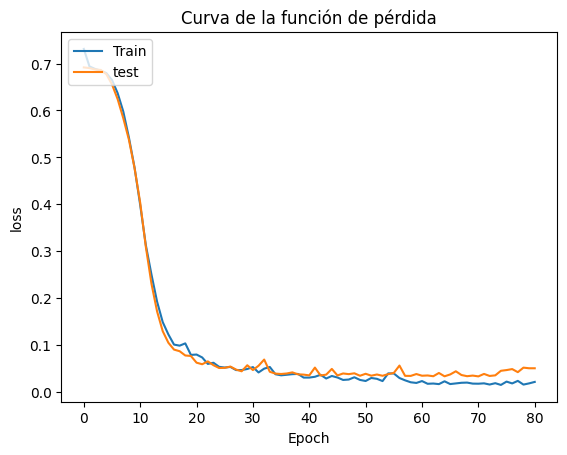

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de la función de pérdida')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','test'], loc='upper left')
plt.show()

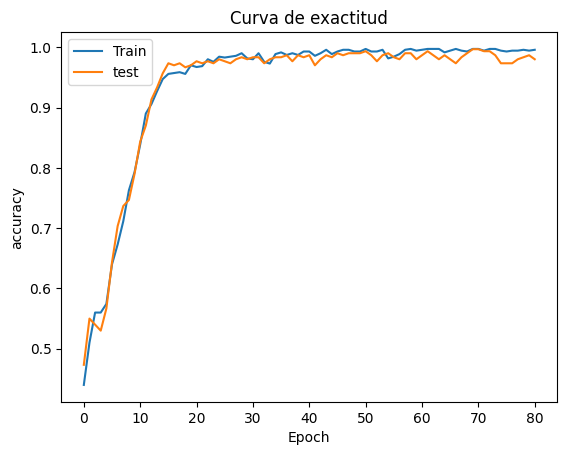

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de exactitud')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','test'], loc='upper left')
plt.show()

Predicciones con los datos de Test, que se toman de los datos originales y en la división quedaron 300.

In [ ]:
predictionLR = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
out = predictionLR.round().astype(int)
out.shape

(300, 1)

Métricas adicionales

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import precision_score, make_scorer, accuracy_score

In [ ]:
print('MAE',mean_absolute_error(y_test,predictionLR)) #Media del error absoluto
print('MSE',mean_squared_error(y_test,predictionLR)) #Media del error cuadratico
print('RMSE',np.sqrt(mean_squared_error(y_test,predictionLR))) #Raiz cuadrada de la media del error cuadratico
print("Certeza del modelo","{0:.2f}%".format(r2_score(y_test,predictionLR)*100))

MAE 0.01843127799870369
MSE 0.007894184289176846
RMSE 0.08884922222043841
Certeza del modelo 96.83%


In [ ]:
model.fit(X_train, y_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9971


In [ ]:
from numpy.lib.function_base import average
pre_scorer = make_scorer(score_func = precision_score, pos_label = 1, greater_is_better=True, average='micro')

# Guardar el modelo

In [ ]:
model.save('/content/drive/My Drive/DOCTORADO/Academica/THESIS/Experimentos/pruebas/model.h5')

In [ ]:
#Instalar librería tensorflow js para convertir el archivo
#!pip install tensorflowjs

In [ ]:
!mkdir carpeta_res

In [ ]:
!tensorflowjs_converter --input_format keras path_to_my_model.h5 carpeta_res/

/bin/bash: line 1: tensorflowjs_converter: command not found


In [ ]:
!ls carpeta_res/

In [ ]:
model.save("modelo.h5")